# Deep Computer Vision with Convolutional Neural Networks

**Chapter 14 – Deep Computer Vision Using Convolutional Neural Networks**

❗️ **This will be very slow, unless you are using a GPU**

❗️ **If you do not, then you should run this notebook in Colab, using a GPU runtime**

Due date: 2023-03-27

File name convention: For group 42 and memebers Richard Stallman and Linus <br> Torvalds it would be <br>
"07_Exercise7_Stallman_Torvalds.pdf".

Submission via blackboard (UA).

Feel free to answer free text questions in text cells using markdown and <br>
possibly $\LaTeX{}$ if you want to.

**You don't have to understand every line of code here and it is not intended** <br> 
**for you to try to understand every line of code.** <br>
**Big blocks of code are usually meant to just be clicked through.**

In [ ]:
group_name = ""
names = ["a", "b", "c"]

# Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")

import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

Let's **import some data** to see how convolutional filters work. One is a scenic <br>
image of china and the other is an image of a flower. The first thing we should <br>
do is **normalize the pixels**.

2 427 640 3


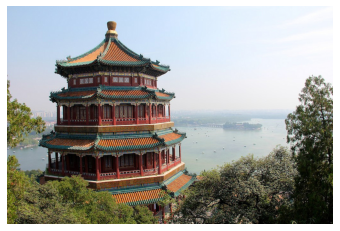

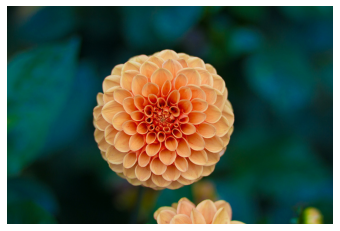

In [ ]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
print(batch_size, height, width, channels)

plt.imshow(china)
plt.axis("off") # Not shown in the book
plt.show()
plt.imshow(flower)
plt.axis("off") # Not shown in the book
plt.show()

Next let's create some filters. Here we're creating image filters that have the <br>
shape **7x7x3x2**. So that's a 7x7 grid which will pass over three color channels <br>
and we have two filters for each of those dimensions. Here we want two filters <br>
as the final dimension to demonstrate creating **vertical** and **horizontal** filters.

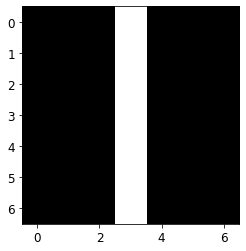

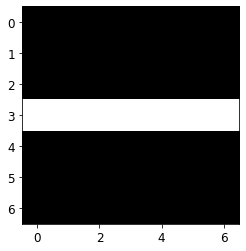

In [ ]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line
plt.imshow(filters[:,:,:,0])
plt.show()
plt.imshow(filters[:,:,:,1])
plt.show()

Notice that when we look at the shape of the outputs of our filters it now has <br>
**final dimension 2 instead of 3**. What we've done here is **reduced our 3** red, <br>
green, blue **(RGB) channels to two filter channels** that have picked out the <br>
vertical and horizontal lines in all three color channels then added them up.

(2, 427, 640, 2)


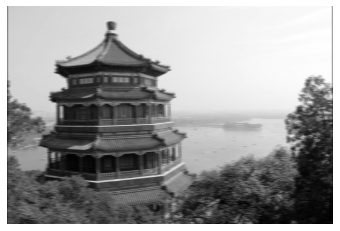

In [ ]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")
print(outputs.shape)

plt.imshow(outputs[0, :, :, 1], cmap='gray') # plot 1st image's 2nd feature map
plt.axis("off") # Not shown in the book
plt.show()

In [ ]:
def crop(images):
    return images[150:220, 130:250]

Let's look at our different color channels to see what an unfiltered image <br>
looks like.

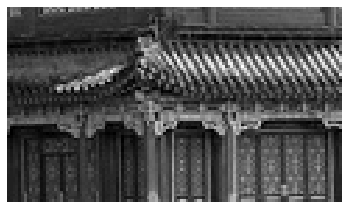

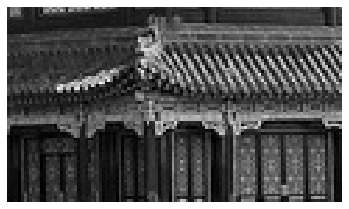

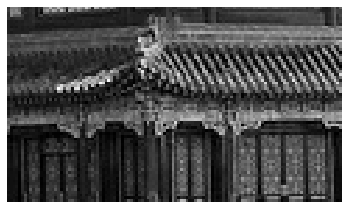

In [ ]:
plot_image(crop(images[0, :, :, 0]))
plt.show()
plot_image(crop(images[0, :, :, 1]))
plt.show()
plot_image(crop(images[0, :, :, 2]))
plt.show()

# Basics: Filters and Pooling

## Task 1: Filters

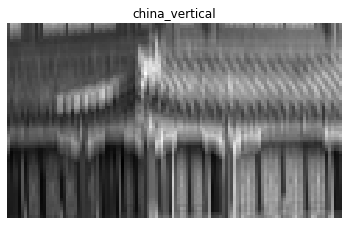

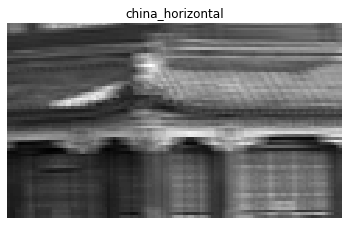

In [ ]:
for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    plt.title(filename)
    plt.show()

**Task 1 a)**: Describe how the filters work and what their purpose in a CNN is.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

**Task 1 a) answer:**

Filters [aka, convolution kernels] are fundamentally small matrices that slider over the input data and preform a mathermatical operation known as convolution. The convolution operation is essentially the filter preforming a dot product between itself and a region of the input data [usually a region of the same size]. This operation is repeated across the entirety of the input data, with the filter sliding over the data 1 pixel at a time. Following the completion of the convolution operation, a feature map is outputted which highlights cerntin features or patterns in the input data.

  The main purpose of utilizing filters in a CNN is to extract useful features from the input data [i.e., lines, textures, edges, etc.] that could be useful to the task its been assigned. Filters aren’t actually hard coded in the network, rather they are automatically learned during the training of the convolution layer, and the network will learn the most useful filter for the given task.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Convolutional Layer in Keras

To create a 2D convolutional layer use `keras.layers.Conv2D()` <br>
(https://keras.io/api/layers/convolution_layers/convolution2d/).

**Task 1 b)**    
Create a convolutional layer with 32 filters and `kernel_size` `(3,3)`. <br>
Apply it to `images[0:1]` and explain the shape of the output. **Do not** <br>
**explicitly pass any filters** this time. Instead, use the default random <br>
initialization called **glorot_uniform** which pulls numbers from a uniform <br>
distribution that goes like the input and output dimensions of each filter.

You can plot the resulting images if you want (for example `plot_image` <br>
`(new_images[0,:,:,0])`).

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
conv = keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1,
                           padding="SAME", activation="relu", input_shape=outputs.shape)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Cropping the Images

In [ ]:
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)

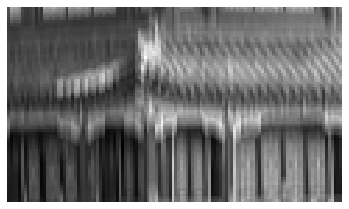

In [ ]:
plot_image(crop(outputs[0, :, :, 0]))
plt.show()

## Task 2: Max Pooling Layer in Keras

Pooling layers are used to **shrink the input image** in order to reduce the <br> computational load, the memory usage, and the number of parameters. 

**Task 2 a)** 
- Create a max pool layer of pool_size=2 <br>
(https://keras.io/api/layers/pooling_layers/max_pooling2d/)
- apply the max pool layer to the `cropped_images` assigning the result to the <br>
variable `output`


↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
max_pool_layer = keras.layers.MaxPool2D(pool_size=2)

In [ ]:
output = max_pool_layer(cropped_images)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

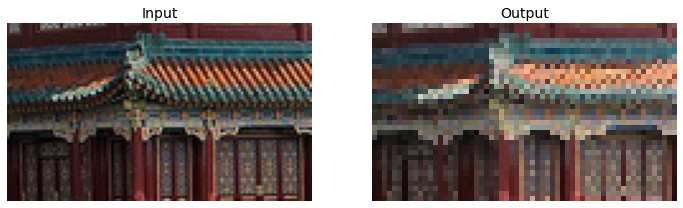

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

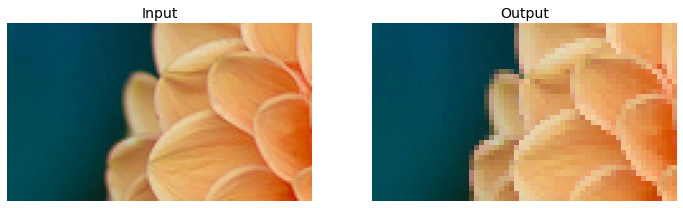

In [ ]:

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[1])
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[1])
ax2.axis("off")
plt.show()

**Task 2 b)**

Describe the effect of the max pooling layer. What are its benefits for a <br> Neural Network? What are the downsides?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 2b) answer

Max pooling layer is the most common type of pooling layer used in CNN. A max pooling layer, downsamples the feature maps by choosing the maximum value within a pooling kernel [i.e., 2x2] and the rest of the other inputs are dropped. The primary effect of the max pooling layer is to reduce the spatial dimensionality of a feature map, but mantaining the most important features.

The benefits of using the max pooling layer in a neural network is the reduction of computational complexity,memory usage, and the number of parameters. Also the max pooling layer introduces a level of invariance to small translations, thus it can recognize patterns in the input data regardless of their location.

The downsides of the max pooling layer is the amount of information loss and that the pool size is fixed.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

# Tackling Fashion MNIST With a CNN

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# normalization
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

### Visualization of Model Structure
This is not necessary, but maybe interesting.

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 14.7 MB/s eta 0:00:00


In [ ]:
import visualkeras

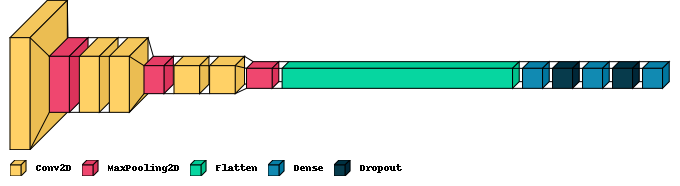

In [ ]:
visualkeras.layered_view(model, legend=True)

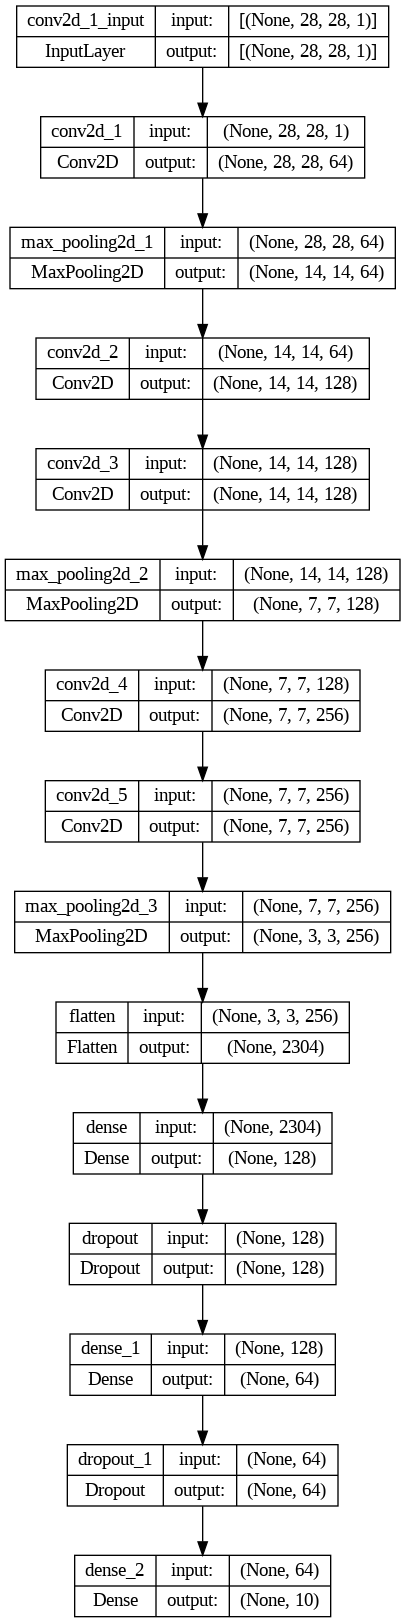

In [ ]:
keras.utils.plot_model(model, show_shapes=True)   # does not need visual keras

## Task 3: 
- Compile the model using `"sparse_categorical_crossentropy"` as `loss`, <br> `"nadam"` as optimizer and `["accuracy"]` for `metrics` <br>
- fit the model for 10 epochs using `[X_valid, y_valid]` as validation data <br>
- `evaluate` the model on `X_test, y_test` <br>
- predict the first 10 instances of `X_test` and compare them to `y_test` <br>

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 33s 13ms/step - loss: 0.7227 - accuracy: 0.7483 - val_loss: 0.3920 - val_accuracy: 0.8674
Epoch 2/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4265 - accuracy: 0.8599 - val_loss: 0.3309 - val_accuracy: 0.8798
Epoch 3/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3653 - accuracy: 0.8781 - val_loss: 0.3058 - val_accuracy: 0.8888
Epoch 4/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3296 - accuracy: 0.8898 - val_loss: 0.2931 - val_accuracy: 0.8938
Epoch 5/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3109 - accuracy: 0.8954 - val_loss: 0.2805 - val_accuracy: 0.8992
Epoch 6/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2903 - accuracy: 0.9013 - val_loss: 0.2887 - val_accuracy: 0.8940
Epoch 7/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2762 - accuracy: 0.9066 - val_loss: 0.2818 - val_

In [ ]:
print(np.argmax(model.predict(X_test[0:10]),axis=1))
print(y_test[:10])

1/1 [==============================] - 0s 20ms/step
[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Task 4: ResNet-34

ResNet is built on the idea of using **residual connections** between early layers <br>
and later layers that the early layers are **not directly attached** to. In effect, <br>
this results in **more total connections** in the neural network without actually <br>
having to add additional weights to the model. 

Imagine you had a function that required **100 coefficients with 10 operations**. <br> 
Instead, you realize that many of the coefficients are **related** to one another <br> 
so you decide to **recycle terms** and  instead **include more recursive operations**. <br> 
Now your function has **20 coefficients** but you're doing **30 operations**.


This is the idea of ResNet. We **reuse the same weights** multiple times but <br> 
connecting them to **different layers** each time. This can lead to models that <br>
are on the order of 5+ times smaller without meaningfully reducing performance.

In [ ]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [ ]:
resnet = keras.models.Sequential()
resnet.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[28,28,1]))
resnet.add(keras.layers.BatchNormalization())
resnet.add(keras.layers.Activation("relu"))
resnet.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    resnet.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
resnet.add(keras.layers.GlobalAvgPool2D())
resnet.add(keras.layers.Flatten())
resnet.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
# keras.utils.plot_model(resnet)

In [ ]:
resnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        3136      
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 residual_unit (ResidualUnit  (None, 7, 7, 64)         74240     
 )                                                               
                                                      

**Task 4:**   <br>
a) Compile the ResNet-34 model with ADAM optimizer and train 10 for epochs <br>
b) Compare the performance the results with the ones from Task 3.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
# resnet.compile(PUT YOUR PARAMETERS HERE)
# next, fit the model to the training set
# evaluate the model on the test set
resnet.compile(loss="sparse_categorical_crossentropy", optimizer='nadam',metrics=["accuracy"])
resnet.fit(X_train,y_train,epochs=10)
resnet.evaluate(X_test,y_test)

Epoch 1/10
1719/1719 [==============================] - 116s 43ms/step - loss: 0.5009 - accuracy: 0.8275
Epoch 2/10
1719/1719 [==============================] - 72s 42ms/step - loss: 0.3459 - accuracy: 0.8768
Epoch 3/10
1719/1719 [==============================] - 71s 42ms/step - loss: 0.3039 - accuracy: 0.8911
Epoch 4/10
1719/1719 [==============================] - 71s 41ms/step - loss: 0.3104 - accuracy: 0.8905
Epoch 5/10
1719/1719 [==============================] - 71s 41ms/step - loss: 0.2763 - accuracy: 0.9005
Epoch 6/10
1719/1719 [==============================] - 71s 41ms/step - loss: 0.2406 - accuracy: 0.9131
Epoch 7/10
1719/1719 [==============================] - 71s 41ms/step - loss: 0.2182 - accuracy: 0.9210
Epoch 8/10
1719/1719 [==============================] - 78s 46ms/step - loss: 0.2029 - accuracy: 0.9253
Epoch 9/10
1719/1719 [==============================] - 81s 47ms/step - loss: 0.1986 - accuracy: 0.9282
Epoch 10/10
313/313 [==============================] - 5s 13ms/

[0.2653166949748993, 0.9085999727249146]

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Task 5: Pretrained Models for Transfer Learning

In this section we use the [tf_flowers](https://www.tensorflow.org/datasets/catalog/tf_flowers) dataset. <br>

We reuse a pretrained [Xception model](https://towardsdatascience.com/review-xception-with-depthwise-separable-convolution-better-than-inception-v3-image-dc967dd42568) to classify pictures of flowers. <br> 
During the first train the weights of the pretrained layers are frozen, while <br> 
for the second train are not frozen.

**WARNING: Do NOT attempt to run the code in this section during the class time.** <br>
**These models may take over an hour to train.**

In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
info.splits

{'train': <SplitInfo num_examples=3670, num_shards=2>}

In [ ]:
class_names = info.features["label"].names
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [ ]:
n_classes = info.features["label"].num_classes

In [ ]:
dataset_size = info.splits["train"].num_examples
dataset_size

3670

**Warning:** TFDS's split API has evolved since the book was published. The <br> 
[new split API](https://www.tensorflow.org/datasets/splits) (called S3) is much <br> 
simpler to use:

In [ ]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

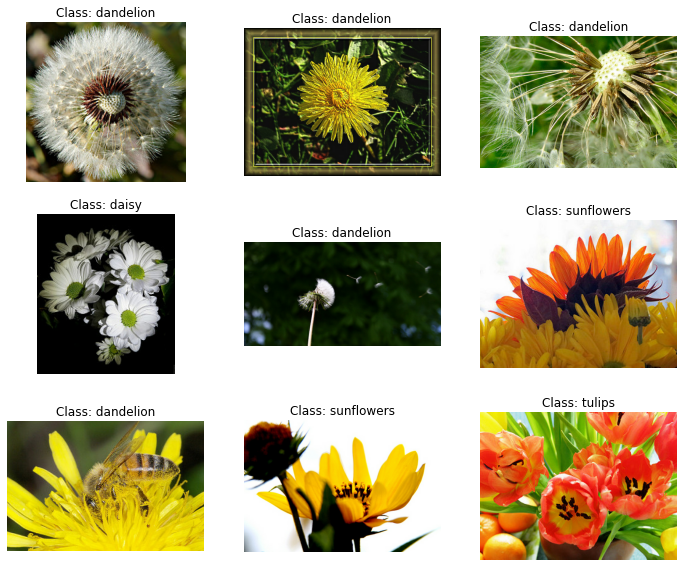

In [ ]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

In [ ]:
def central_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]])
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]

def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3])

def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

batch_size = 32
train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set.map(partial(preprocess, randomize=True)).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

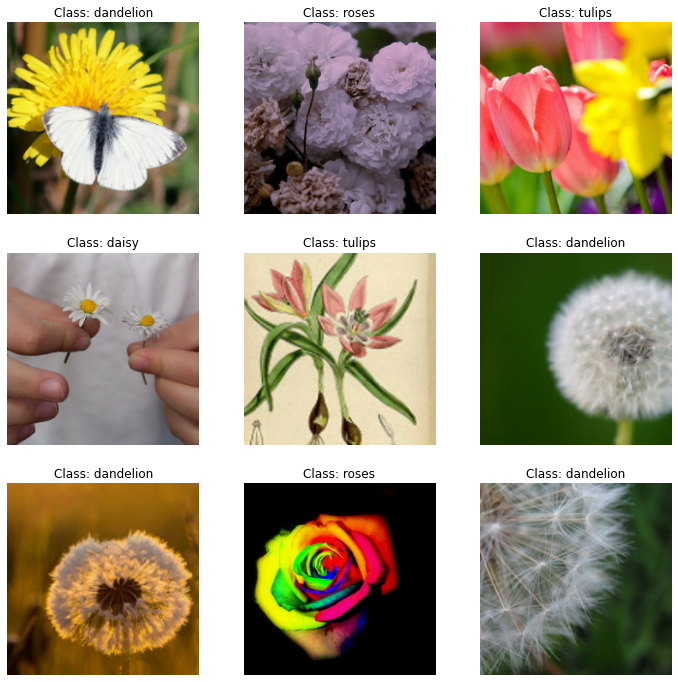

In [ ]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in train_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

In [ ]:
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg    = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model  = keras.models.Model(inputs=base_model.input, outputs=output)

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
#keras.utils.plot_model(model)

In [ ]:
# base_model not trainable

for layer in base_model.layers:
    layer.trainable = False

optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, weight_decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

Epoch 1/5
86/86 [==============================] - 22s 173ms/step - loss: 1.2322 - accuracy: 0.7976 - val_loss: 1.2029 - val_accuracy: 0.8364
Epoch 2/5
86/86 [==============================] - 14s 168ms/step - loss: 0.8043 - accuracy: 0.8706 - val_loss: 1.3406 - val_accuracy: 0.8107
Epoch 3/5
86/86 [==============================] - 14s 167ms/step - loss: 0.7419 - accuracy: 0.8761 - val_loss: 1.6168 - val_accuracy: 0.8346
Epoch 4/5
86/86 [==============================] - 14s 164ms/step - loss: 0.4552 - accuracy: 0.9106 - val_loss: 1.2829 - val_accuracy: 0.8456
Epoch 5/5
86/86 [==============================] - 14s 163ms/step - loss: 0.4246 - accuracy: 0.9106 - val_loss: 1.0232 - val_accuracy: 0.8603


In [ ]:
#@title Default title text
# base_model trainable

for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, weight_decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=40)

Epoch 1/40
86/86 [==============================] - 62s 530ms/step - loss: 0.3824 - accuracy: 0.8819 - val_loss: 0.6750 - val_accuracy: 0.8640
Epoch 2/40
86/86 [==============================] - 43s 499ms/step - loss: 0.1306 - accuracy: 0.9575 - val_loss: 0.3228 - val_accuracy: 0.9026
Epoch 3/40
86/86 [==============================] - 43s 506ms/step - loss: 0.0846 - accuracy: 0.9760 - val_loss: 0.3134 - val_accuracy: 0.8952
Epoch 4/40
86/86 [==============================] - 44s 508ms/step - loss: 0.0613 - accuracy: 0.9807 - val_loss: 0.2716 - val_accuracy: 0.9228
Epoch 5/40
86/86 [==============================] - 44s 509ms/step - loss: 0.0446 - accuracy: 0.9840 - val_loss: 0.3923 - val_accuracy: 0.8842
Epoch 6/40
86/86 [==============================] - 44s 506ms/step - loss: 0.0282 - accuracy: 0.9909 - val_loss: 0.3157 - val_accuracy: 0.9154
Epoch 7/40
86/86 [==============================] - 44s 509ms/step - loss: 0.0350 - accuracy: 0.9909 - val_loss: 0.2830 - val_accuracy: 0.9283

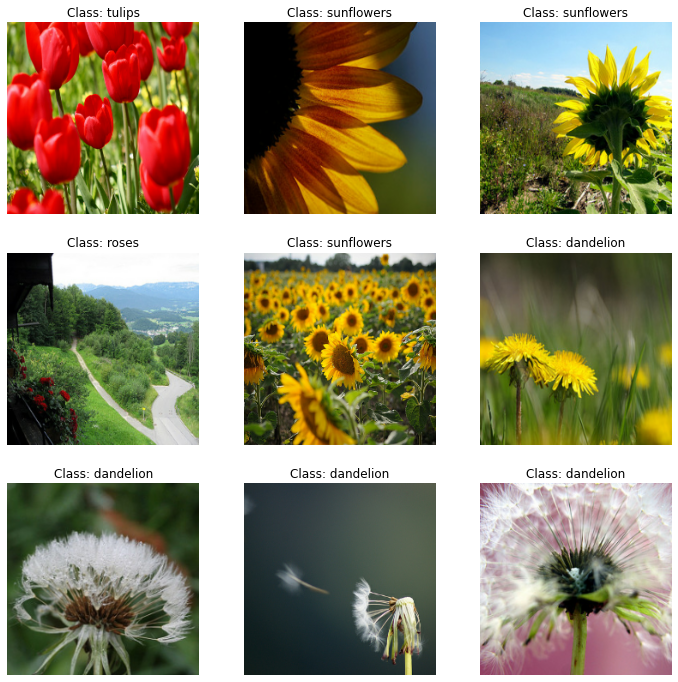

In [ ]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in test_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

**Task 5:**
- Task 5a) Explain transfer learning and its benefits
- Task 5b) Compare the two trainings above (with/without base model trainable). <br> 
What is the difference and which one performs better here?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 5a) answer:

Transfer learning is a machine learning technique in which one would search for a existing neural network that accomplishes a similar task to the one at hand, and then reusing the lower layers of this network. In this technique, the learned representations of the pre-trained model are reused and fine-tuned for the new task, rather than training a model from scratch.

The benefits of transfer learning is its speeds up training and requires significantly less training data.

Task 5b) answer:

When the base model is trainable, we see there is a much better validation accuracy (0.93) than in the case where the base model is not trainable (0.86). The difference here is that when you do not train the base model, you leave the predetermined layers of the original model frozen. When you do retrain the base model this will fine-tune your results and can often lead to a better generalization of the problem, hence the better validation accuracy.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

# Task 6: High Accuracy CNN for MNIST
Build your own CNN and try to achieve the highest possible accuracy on MNIST. <br>
A basic structure is given below, play around with it.

The following model uses 2 convolutional layers, followed by 1 pooling layer, <br> 
then dropout 25%, then a dense layer, another dropout layer but with 50% <br> dropout, and finally the output layer. It reaches about 99.2% accuracy on the <br> 
test set. This places this model roughly in the top 20% in the <br>
[MNIST Kaggle competition](https://www.kaggle.com/c/digit-recognizer/) \(if we ignore the models with an accuracy greater <br> 
than 99.79% which were most likely trained on the test set, as explained by <br> 
Chris Deotte in [this post](https://www.kaggle.com/c/digit-recognizer/discussion/61480)). 

In order to reach an accuracy higher than 99.5% on the test set you might try:

a) batch normalization layers<br> 
(https://keras.io/api/layers/normalization_layers/batch_normalization/)   
b) set a learning scheduler (Check Chapter 11)<br>
c) add image augmentation (Check Chapter 14)<br>
d) create an ensemble (Check Chapter 14)<br>
e) use hyperparameter tuning, e.g. with [keras tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner) (Hyperband seems to <br>
work quite well) 

As long as you implement at least **two** of the above you will get full points <br> 
on this one. 

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)

Epoch 1/10
1719/1719 [==============================] - 13s 6ms/step - loss: 0.1896 - accuracy: 0.9416 - val_loss: 0.0462 - val_accuracy: 0.9862
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0780 - accuracy: 0.9767 - val_loss: 0.0408 - val_accuracy: 0.9894
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0588 - accuracy: 0.9821 - val_loss: 0.0367 - val_accuracy: 0.9906
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0461 - accuracy: 0.9860 - val_loss: 0.0343 - val_accuracy: 0.9902
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0408 - accuracy: 0.9877 - val_loss: 0.0366 - val_accuracy: 0.9902
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0420 - val_accuracy: 0.9894
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0309 - accuracy: 0.9905 - val_loss: 0.0351 - val_ac

[0.024004045873880386, 0.9933000206947327]